# Census Income Project


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of Final Weight

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.


We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing Libraries 

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [155]:
data = pd.read_csv('Census Income Project')

In [156]:
data = pd.DataFrame(data = data)

In [157]:
data.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [158]:
#Checking datatypes of each attributes
data.dtypes 

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [159]:
#Now checking the shape of our datasets
data.shape

(32560, 15)

In [160]:
#checking the columns in out datasets
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [161]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation:
As we have full describtion of the dataset in with we can observe that in age column the min age is 17 and the Max is 90 
As in Hours per week the min work hours is 1 and the maximum is 99 
As in captial_gain & capital_loss we can see the most data is around 0

In [162]:
#Checking the null values of the datasets
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see there is no null values present in dataset

# EDA & Data Visualisation

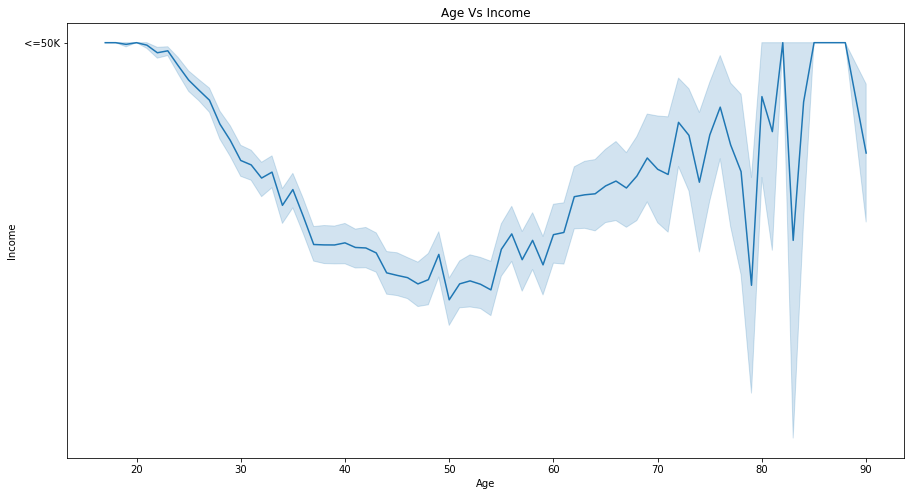

In [163]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'Age', y = 'Income', data=data)
plt.title('Age Vs Income')
plt.show()

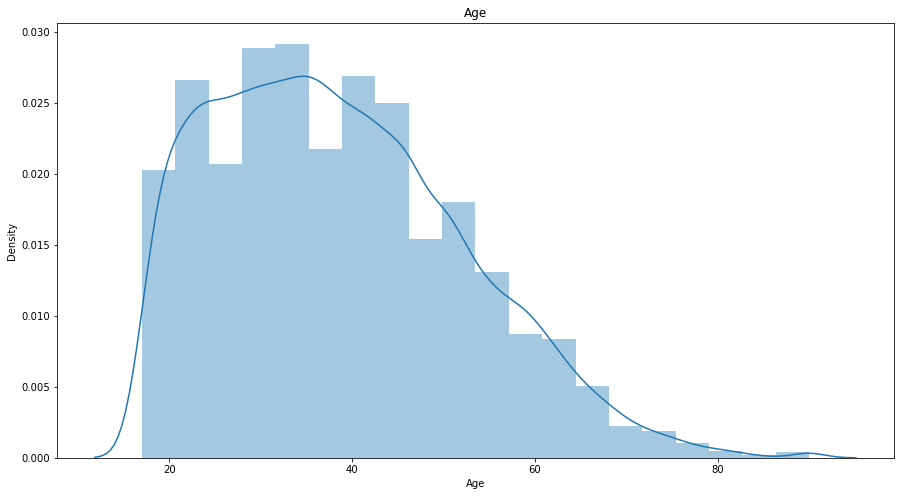

In [164]:
plt.figure(figsize=(15,8))
sns.distplot(data['Age'], bins=20)
plt.title('Age')
plt.show()

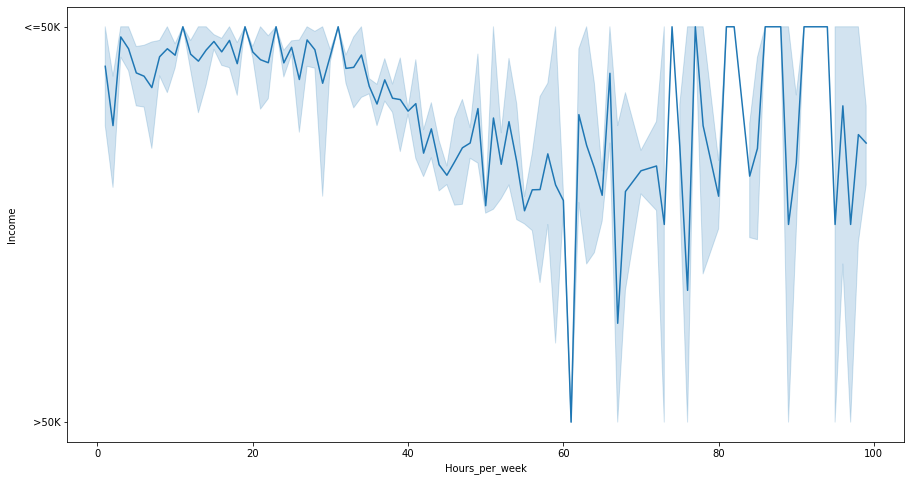

In [165]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'Hours_per_week', y = 'Income', data=data)
plt.show()

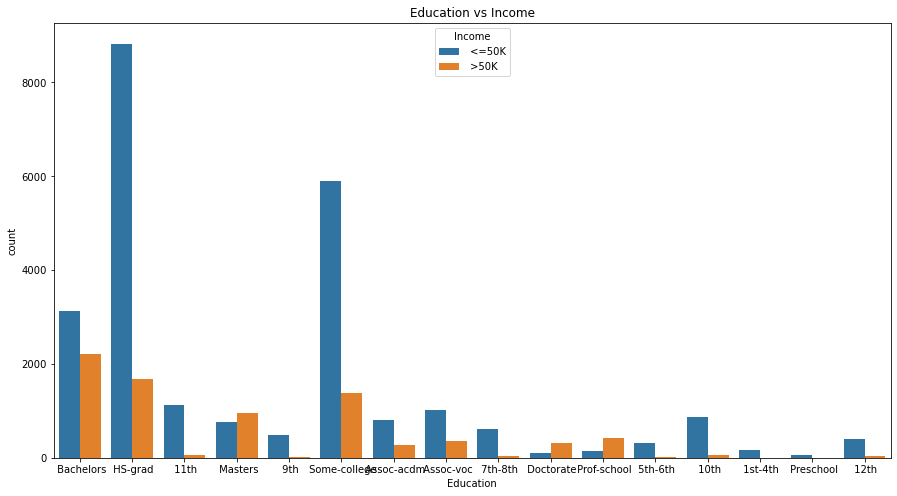

In [166]:
plt.figure(figsize=(15,8))
sns.countplot(data['Education'], hue=data['Income'])
plt.title('Education vs Income')
plt.show()

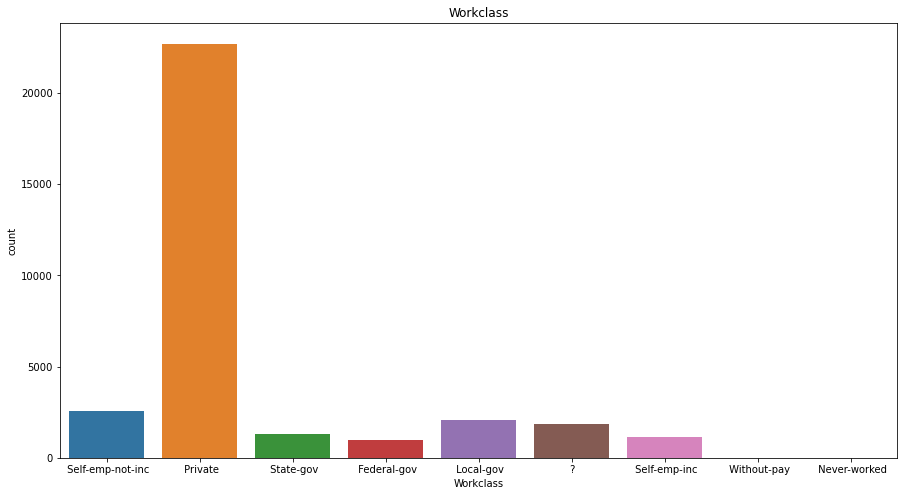

In [167]:
plt.figure(figsize = (15,8))
sns.countplot(x="Workclass" , data=data)
plt.title("Workclass")
plt.show()

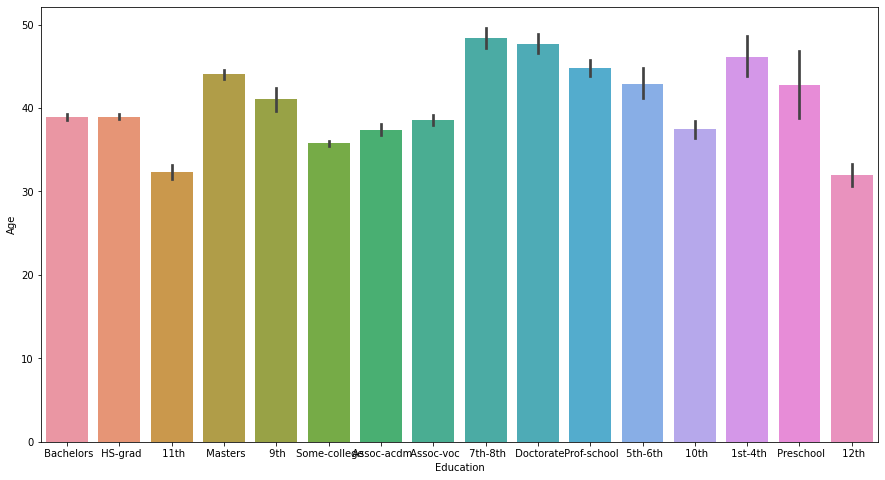

In [168]:
plt.figure(figsize=(15,8))
sns.barplot(x='Education',y='Age',data=data)
plt.show()

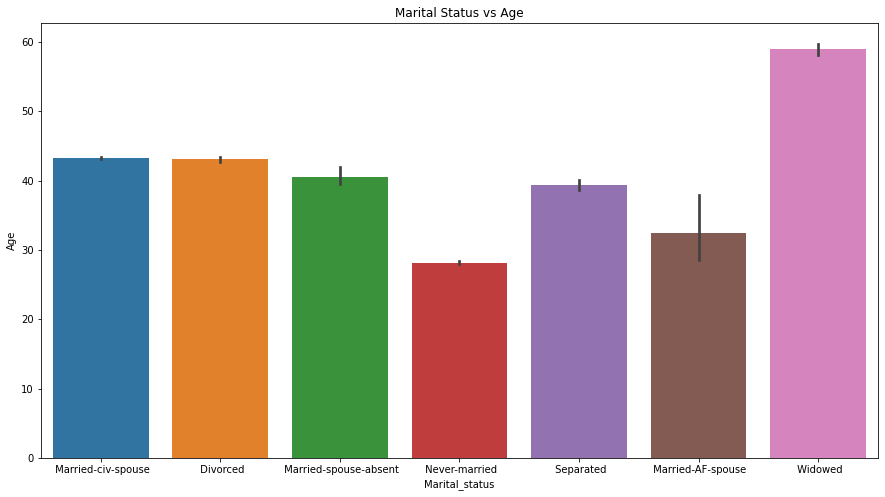

In [169]:
plt.figure(figsize=(15,8))
sns.barplot(x='Marital_status',y='Age',data=data)
plt.title('Marital Status vs Age')
plt.show()

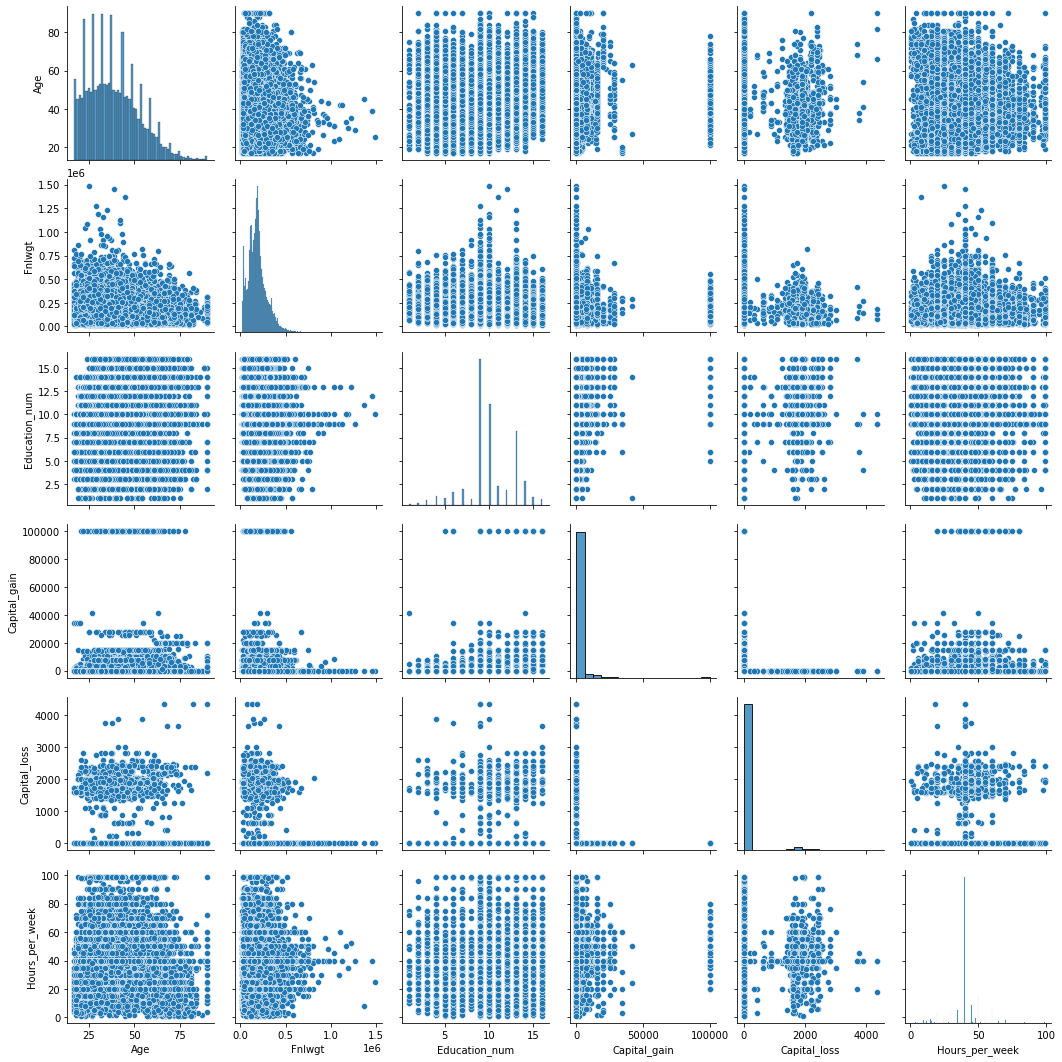

In [170]:
sns.pairplot(data)

In [178]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Label Encoding

In [200]:
label_list=list(data.select_dtypes(['object']).columns) 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for i in label_list:
   data[i] = le.fit_transform(data[i]) 

In [184]:
x = data.drop("Income", axis=1)
y = data["Income"]

# Scaling

In [199]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() 
new = scale.fit(x)  
scale_x = new.transform(x) 
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.452055,0.75,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.0,0.0,0.122449,0.951220
1,0.287671,0.50,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.0,0.0,0.397959,0.951220
2,0.493151,0.50,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.0,0.0,0.397959,0.951220
3,0.150685,0.50,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.0,0.0,0.397959,0.121951
4,0.273973,0.50,0.184932,0.800000,0.866667,0.333333,0.285714,1.0,1.0,0.0,0.0,0.0,0.397959,0.951220


# Random State

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8306715806715806  on Random_state  47


# Creating Train Test Split

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Model Building

In [190]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [192]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]



In [193]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8306715806715806
[[7051  408]
 [1246 1063]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7459
           1       0.72      0.46      0.56      2309

    accuracy                           0.83      9768
   macro avg       0.79      0.70      0.73      9768
weighted avg       0.82      0.83      0.82      9768



Accuracy score of DecisionTreeClassifier() is:
0.812039312039312
[[6504  955]
 [ 881 1428]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7459
           1       0.60      0.62      0.61      2309

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.74      9768
weighted avg       0.81      0.81      0.81      9768



Accuracy score of SVC() is:
0.8502252252252253
[[7041  418]
 [1045 1264]]
              precision    recall  f1-score   support

           0       0.87      0.9

As we can see RandomForest Classifier is performing best at 85%

# Hyper Parameter Tuning

In [198]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train)
clf.best_params_  

{'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 20}

Our best parameters

In [201]:
clf_pred=clf.best_estimator_.predict(x_test) 

In [202]:
accuracy_score(y_test,clf_pred) 

0.8676289926289926

In [203]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8676289926289926
[[7034  425]
 [ 868 1441]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7459
           1       0.77      0.62      0.69      2309

    accuracy                           0.87      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.87      0.86      9768



In [204]:
import joblib
joblib.dump(clf.best_estimator_,"PJ6_Census.obj")
SVR_from_joblib=joblib.load("PJ6_Census.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([0, 1, 1, ..., 0, 1, 0])

In [205]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     0     1     1     0     0     0     0     0     1     0     0   
Original      0     0     1     0     0     0     0     0     1     0     1   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     0     1     0     0     0     0     0     1     0     0     0   
Original      0     1     0     0     0     0     0     1     1     0     0   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     0     1     0     0     0     0     0     0     0     0     0   
Original      0     1     0     0     0     0     0     0     1     0     0   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     0     0     0     0     1     1     0     0     0     0     0   
Original      0     0     0     0     1     1     0     0     0     0     0   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     0     0     0     0     0     0     0     0     0     1     1   
Original      0     0     0     0     1     0     0     1     0     0     1   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     0     0     1     0     1     0     0     1     0     0     0   
Original      0     1     1     0     1     0     0     1     0     0     1   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     0     0     0     0     0     0     0     1     1     0     0   
Original      0     0     1     1     0     0     0     1     0     0     1   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     0     0     0     0     0     0     0     0     1     1     0   
Original      0     0     0     0     0     0     0     0     1     1     0   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     0     0     0     0     0     0     0     0     1     0     0   
Original      0     0     1     0     0     0     0     1     1     0     0   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     0     1     0     0     0     0     0     0     0     1     0   
Original      0     1     0     0     0     0     0     1     0     1     0   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     0     0     0     1     0     0     1     0     1     0     1   
Original      1     0     0     1     1     0     1     0     1     0     1   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     0     1     0     0     0     1     0     0     0     0   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     0     1     0     0     0     0     0     0     0     0     0   
Original      1     1     0     0     0     0     1     0     0     0     0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     0     0     0     1     0     1     0     1     1     0     0   
Original      1     0     0     1     0     1     0     1     1     0     0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     1     0     0     0     0     0     0     0     0     0     0   
Original      0     0     0     0     0     1     0     0     0     0     0   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     0     1     0     0     0     0     1     1     0     0     0   
Original      0     1     0     0     0     0     1     1     0     0     1   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     0     0     1     0     0     0     0     0     1     0     0   
Original      0     0     1     0     0     1